In [1]:
#Library importing
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from  tensorflow.keras import datasets,layers,models
import cv2 as cv
import sklearn
import os
import scipy
# from sklearn.model_selection import train_test_split

In [2]:
#Menyiapkan datasets

train_mentah_dir = os.path.join('train/Pisang Mentah')
train_matang_dir = os.path.join('train/Pisang Matang')
train_setmatang_dir = os.path.join('train/Pisang SetMatang')

valid_mentah_dir = os.path.join('valid/Pisang Mentah')
valid_matang_dir = os.path.join('valid/Pisang Matang')
valid_setmatang_dir = os.path.join('valid/Pisang SetMatang')


In [3]:
# Mengecek banyaknya data

print('total training Pisang Mentah images:', len(os.listdir(train_mentah_dir)))
print('total training Pisang Matang images:', len(os.listdir(train_matang_dir)))
print('total training Pisang SetMatang images:', len(os.listdir(train_setmatang_dir)))

print('total validation Pisang Mentah images:', len(os.listdir(valid_mentah_dir)))
print('total validation Pisang Matang images:', len(os.listdir(valid_matang_dir)))
print('total validation Pisang SetMatang images:', len(os.listdir(valid_setmatang_dir)))


total training Pisang Mentah images: 281
total training Pisang Matang images: 330
total training Pisang SetMatang images: 88
total validation Pisang Mentah images: 16
total validation Pisang Matang images: 12
total validation Pisang SetMatang images: 10


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
nrows = 4
ncols = 4
pic_index = 0

In [6]:
train_mentah_names =os.listdir(train_mentah_dir)
train_matang_names = os.listdir(train_matang_dir)
train_setmatang_names = os.listdir(train_setmatang_dir)


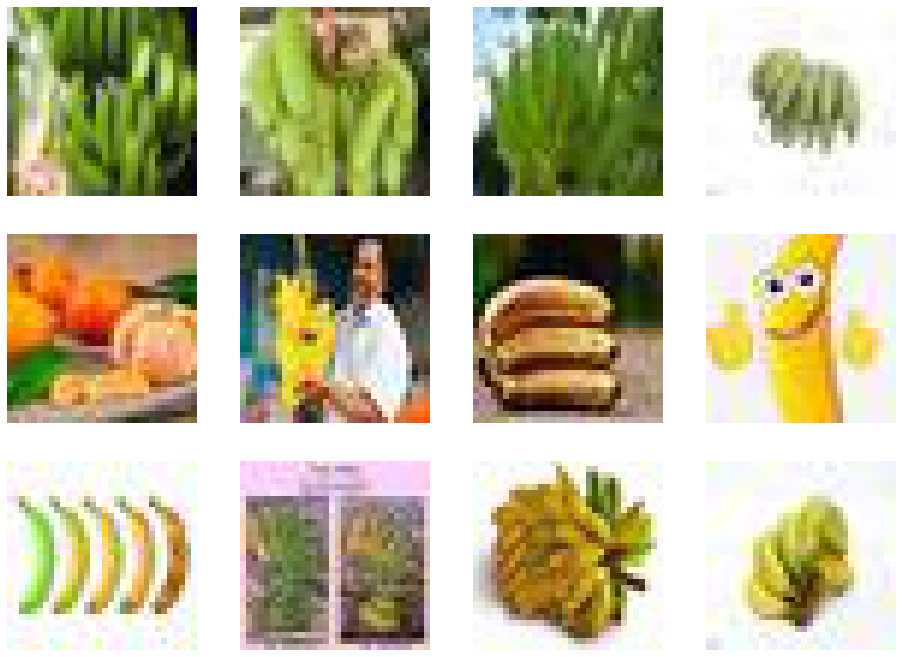

In [7]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_mentah_pic = [os.path.join(train_mentah_dir, fname) 
                for fname in train_mentah_names[pic_index-4:pic_index]]
next_matang_pic = [os.path.join(train_matang_dir, fname) 
                for fname in train_matang_names[pic_index-4:pic_index]]
next_setmatang_pic = [os.path.join(train_setmatang_dir, fname) 
                for fname in train_setmatang_names[pic_index-4:pic_index]]


for i, img_path in enumerate(next_mentah_pic + next_matang_pic + next_setmatang_pic):
  
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)
 

plt.show()

In [28]:
class_names = ['Pisang Matang','Pisang Mentah','Pisang SetMatang']

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train = ImageDataGenerator(rescale=1/255) 
valid = ImageDataGenerator(rescale=1/255)
train_dataset = train.flow_from_directory('train/',target_size=(200,200),
                                          batch_size=3,
                                          class_mode='binary')
valid_dataset = valid.flow_from_directory('valid/',target_size=(200,200),
                                          batch_size=3,
                                          class_mode='binary')

Found 696 images belonging to 3 classes.
Found 35 images belonging to 3 classes.


In [11]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator


# # All images will be rescaled by 1./255
# train_datagen = ImageDataGenerator(rescale=1/255)
# validation_datagen = ImageDataGenerator(rescale=1/255)

# # Flow training images in batches of 120 using train_datagen generator
# train_generator = train_datagen.flow_from_directory(
#         'train/',  # This is the source directory for training images
#         classes = ['Pisang Mentah', 'Pisang Matang','Pisang SetMatang'],
#         target_size=(32, 32),  # All images will be resized to 32x32
#         batch_size=3,
#         # Use binary labels
#         class_mode='binary')

# # Flow validation images in batches of 19 using valid_datagen generator
# validation_generator = validation_datagen.flow_from_directory(
#         'valid/',  # This is the source directory for training images
#         classes = ['Pisang Mentah', 'Pisang Matang','Pisang SetMatang'],
#         target_size=(32, 32),  # All images will be resized to 32x32
#         batch_size=35,
#         # Use binary labels
#         class_mode='binary',
#         shuffle=False)

In [12]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

from keras.models import Sequential
from keras.layers import Activation, Dense, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten
from keras.preprocessing.image import ImageDataGenerator


In [13]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(200,200,3)))
# model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(3,activation='softmax'))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-04-06 23:31:55.304816: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-06 23:31:55.305355: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200, 200, 64)      256       
                                                                 
 dense_1 (Dense)             (None, 200, 200, 512)     33280     
                                                                 
 dense_2 (Dense)             (None, 200, 200, 256)     131328    
                                                                 
 dense_3 (Dense)             (None, 200, 200, 128)     32896     
                                                                 
 dense_4 (Dense)             (None, 200, 200, 64)      8256      
                                                                 
 dense_5 (Dense)             (None, 200, 200, 32)      2080      
                                                                 
 flatten (Flatten)           (None, 1280000)           0

In [16]:
history = model.fit(train_dataset,
      # steps_per_epoch=0,  
      epochs=3,
      verbose=1,
      validation_data = valid_dataset,
      validation_steps=20)

2022-04-06 23:31:55.842323: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/3


2022-04-06 23:31:56.389260: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


232/232 [==============================] - ETA: 0s - loss: 0.9957 - accuracy: 0.6667

2022-04-06 23:34:56.086660: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


232/232 [==============================] - 182s 781ms/step - loss: 0.9957 - accuracy: 0.6667 - val_loss: 0.6979 - val_accuracy: 0.6857
Epoch 2/3
232/232 [==============================] - 166s 717ms/step - loss: 0.5369 - accuracy: 0.8190
Epoch 3/3
232/232 [==============================] - 166s 716ms/step - loss: 0.4936 - accuracy: 0.8362


In [17]:
model.evaluate(valid_dataset)

12/12 [==============================] - 2s 204ms/step - loss: 0.6852 - accuracy: 0.8000


[0.6851579546928406, 0.800000011920929]

In [18]:
from tensorflow.keras.models import load_model

In [33]:
#model.save('cobamodel5.h5')

In [20]:
from tensorflow.keras.preprocessing import image
import os

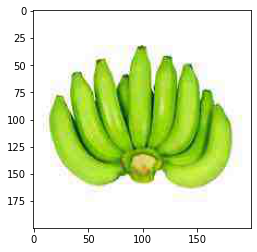

In [34]:
img = cv.imread('hijau.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img,cmap=plt.cm.binary)

In [35]:
img.shape

(200, 200, 3)

In [36]:
predictions = model.predict(np.array([img])/255 )
index = np.argmax(predictions)
print(f'Prediction is {class_names[index]}')

Prediction is Pisang Mentah
